<a href="https://colab.research.google.com/github/sayan0506/Classifying-the-cylindrical-bearings-based-on-needle-count/blob/main/Cynlr_3_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cylindrical Bearings Ring Counts 

In [22]:
from matplotlib import pyplot as plt 
from pathlib import Path
import os
import matplotlib.image as mpimg
import cv2
import numpy as np
import sys
from google.colab.patches import cv2_imshow
#import cv2_imshow

**Image storing**

Image file path in drive "**/content/drive/MyDrive/Cylindrical Bearings**"

In [2]:
def images_list(good_image_path, bad_image_path):
  paths_good = sorted(Path(good_image_path).iterdir())
  paths_bad = sorted(Path(bad_image_path).iterdir())
  good_images = {}
  bad_images = {}
  for i, imagename in enumerate(paths_good):
    if str(imagename).find('png') == -1 and str(imagename).find('jpeg') == -1 and str(imagename).find('bmp') == -1:
      continue
    else:
      #print(imagename)
      #print(sorted(os.listdir(good_image_path)))
      good_images[sorted(os.listdir(good_image_path))[i]] = mpimg.imread(imagename)
      #good_images[set(imagename.split(paths_good)).difference(set(paths_good.split(paths_good))]
  for i,imagename in enumerate(paths_bad):
    if str(imagename).find('png') == -1 and str(imagename).find('jpeg') == -1 and str(imagename).find('bmp') == -1:
      continue
    else:
      #print(imagename)  
      bad_images[sorted(os.listdir(bad_image_path))[i]] = mpimg.imread(imagename)
  print(f'Good image names: {good_images.keys()}')
  print(f'Bad image names: {bad_images.keys()}')
  
  # returns both image dictionary
  return good_images, bad_images


**Generating image dictionary**

In [3]:
good_image_path = '/content/drive/MyDrive/Cylindrical Bearings/Good' 
bad_image_path = '/content/drive/MyDrive/Cylindrical Bearings/Bad' 

good_images, bad_images = images_list(good_image_path, bad_image_path)

Good image names: dict_keys(['1.png', '2.png', '3.png'])
Bad image names: dict_keys(['1.png', '2.png', '3.bmp'])


In [4]:
# in image visualization we pass the figure_title, image dictionary
# image count is the total images we want to visualize 
# assuming max 5 images in a row
# enter number of columns
# Consider each row consist equal number of images
# for dynamic row and column work later

def image_visualization(fig_title, image_dict, row, column, image_count):
  row = row
  col = column
  fig = plt.figure(figsize = (30,8))
  fig.suptitle(fig_title, fontsize = 24)
  for i,imagename in enumerate(image_dict.keys()):
    #print(image_dir[imagename].shape)
    fig.add_subplot(row, col, i+1)
    plt.imshow(image_dict[imagename], cmap = 'binary')
    plt.axis('off')
  plt.show()



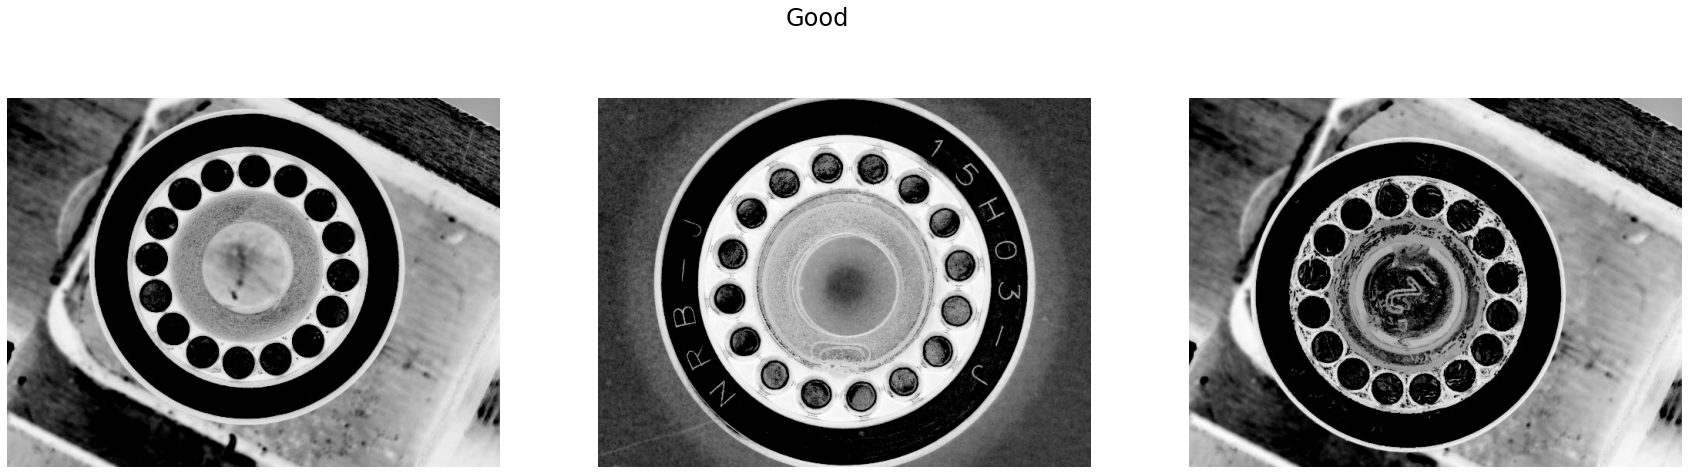

In [5]:
# good image visualization
fig_title = 'Good'
image_dict = good_images
row = 1
column = 3
image_count = 3
image_visualization(fig_title, image_dict, row, column, image_count)

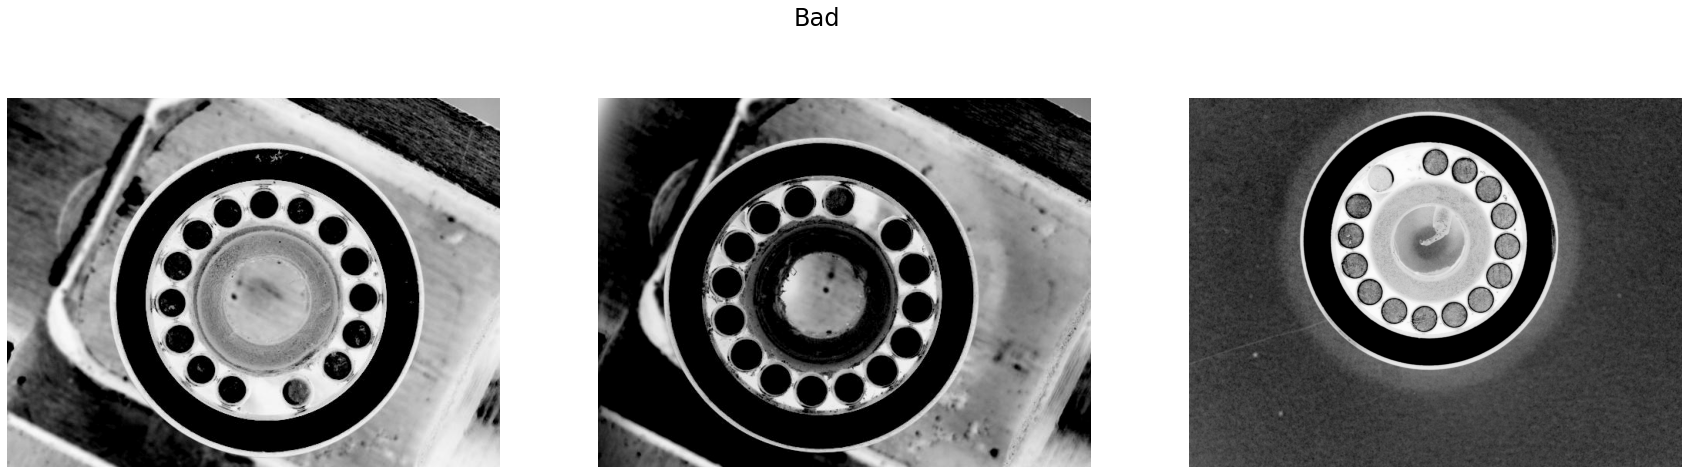

In [111]:
# good image visualization
fig_title = 'Bad'
image_dict = bad_images
row = 1
column = 3
image_count = 3
image_visualization(fig_title, image_dict, row, column, image_count)

In [53]:
import cv2
import numpy as np
import sys

img = cv2.imread('/content/drive/MyDrive/Cylindrical Bearings/Bad/3.bmp', 0)

In [54]:
img.shape

(1944, 2592)

In [57]:
im3 = bad_images[list(bad_images.keys())[1]]

In [59]:
img = cv2.medianBlur(im3,5)
#cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=5,maxRadius=25)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2_imshow(cimg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

error: ignored

In [129]:
print(f'Circle counts {circles.shape[1]}')

Circle counts 169


In [175]:
img2 = cv2.resize(im1, (480,640))

In [56]:
im3 = bad_images[list(bad_images.keys())[1]]

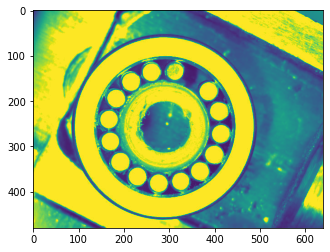

In [48]:
plt.imshow(im3)

In [49]:
image = cv2.resize(im3,(0,0), fx = 0.5, fy = 0.5)

In [50]:
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(image, (7,7), sigmaX = -1, sigmaY = -1)

In [51]:
row = gray.shape[0]

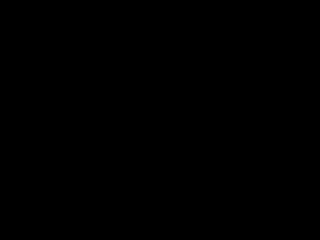

In [52]:

circles = cv2.HoughCircles(edges,cv2.HOUGH_GRADIENT,1,row/2,
                            param1=130,param2=100,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(gray,(i[0],i[1]),i[2],(0,255,255),2)
    # draw the center of the circle
    cv2.circle(gray,(i[0],i[1]),2,(0,0,255),3)

cv2_imshow(gray)

In [45]:
edges = cv2.Canny(gray,50,150,apertureSize = 3)

error: ignored

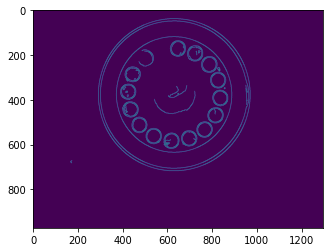

In [46]:
plt.imshow(edges)